### Diffusion Equation in 1-D

https://drzgan.github.io/Python_CFD/5.%201D%20diffusion%20equation.html 

The 1-D diffusion equation is given by

### $\frac{\partial u}{\partial t} = v \frac{\partial ^ 2 u}{\partial x^2}$

To Discretize $\frac{\partial ^ 2 u}{\partial x^2}$, we can use the central difference scheme
- Create the taylor expansion of $u_{i+1}$ and $u_{i-1}$, and add them together
- Ignore terms past the third term, or $< O(\Delta x^4)$

Use forward discretization for the first term as before, and simplifying, we get

### $u_i^{n+1} = u_i^n + \frac{v \Delta t}{\Delta x^2} + u_{i+1}^n - 2u_i^n + u_{i-1}^n$


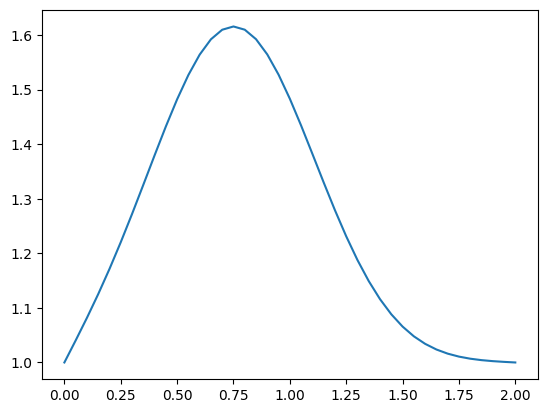

In [14]:
import numpy as np
import matplotlib.pyplot as plt

nx = 41
dx = 2.0 / (nx - 1)
nt = 100
nu = 0.9 # diffusion coefficent
sigma = .2 # numerical stability criterion 
dt = sigma * dx**2 / nu 

u = np.ones(nx) # initialize u
u[int(.5 / dx):int(1 / dx + 1)] = 2 # set initial hat function

un = np.ones(nx) 

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2*un[i] + un[i-1])
        
plt.plot(np.linspace(0,2, nx), u)